In [1]:
import sys 
sys.path.append('../')
import pandas as pd 
import numpy as np 
import ta
import sqlite3 as sql
import matplotlib.pyplot as plt 
from backtester import * 
from fxcmtoken import major_forex_pairs

In [2]:
major_forex_pairs

['EUR/USD', 'GBP/USD', 'USD/JPY', 'USD/CHF', 'USD/CAD', 'AUD/USD', 'NZD/USD']

In [3]:
conn = sql.connect('../PriceData/PriceData_m5.db')
ticker = major_forex_pairs[1]
data = pd.read_sql(f"SELECT * FROM '{ticker}'", conn, parse_dates=['date'], index_col=['date'])
for col in ['open', 'close', 'high', 'low']:
    data[col] = data[['bid'+col, 'ask'+col]].mean(axis=1)
conn.close()
data

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,close,high,low
date,,,,,,,,,,,,,
2021-08-31 00:35:00,1.37592,1.37604,1.37609,1.37593,1.37608,1.37619,1.37625,1.37608,177,1.376000,1.376115,1.376170,1.376005
2021-08-31 00:40:00,1.37604,1.37582,1.37604,1.37582,1.37619,1.37598,1.37619,1.37597,167,1.376115,1.375900,1.376115,1.375895
2021-08-31 00:45:00,1.37582,1.37592,1.37597,1.37581,1.37598,1.37607,1.37613,1.37596,150,1.375900,1.375995,1.376050,1.375885
2021-08-31 00:50:00,1.37592,1.37625,1.37629,1.37572,1.37607,1.37640,1.37645,1.37587,665,1.375995,1.376325,1.376370,1.375795
2021-08-31 00:55:00,1.37625,1.37620,1.37629,1.37604,1.37640,1.37636,1.37644,1.37620,318,1.376325,1.376280,1.376365,1.376120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-18 13:15:00,1.37288,1.37244,1.37312,1.37228,1.37299,1.37257,1.37324,1.37240,1052,1.372935,1.372505,1.373180,1.372340
2021-10-18 13:20:00,1.37245,1.37304,1.37308,1.37237,1.37257,1.37319,1.37322,1.37249,1102,1.372510,1.373115,1.373150,1.372430
2021-10-18 13:25:00,1.37304,1.37383,1.37390,1.37302,1.37318,1.37397,1.37404,1.37315,1233,1.373110,1.373900,1.373970,1.373085


In [4]:
window = 20
adx = ta.trend.ADXIndicator(high=data['high'], low=data['low'], close=data['close'], window=window, fillna=False)

In [5]:
data['adx'] = adx.adx()
data['adx_pos'] = adx.adx_pos()
data['adx_neg'] = adx.adx_neg()

/home/kachain/anaconda3/envs/DL/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/home/kachain/anaconda3/envs/DL/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [16]:
data = data.iloc[window+1:, :]

/home/kachain/anaconda3/envs/DL/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


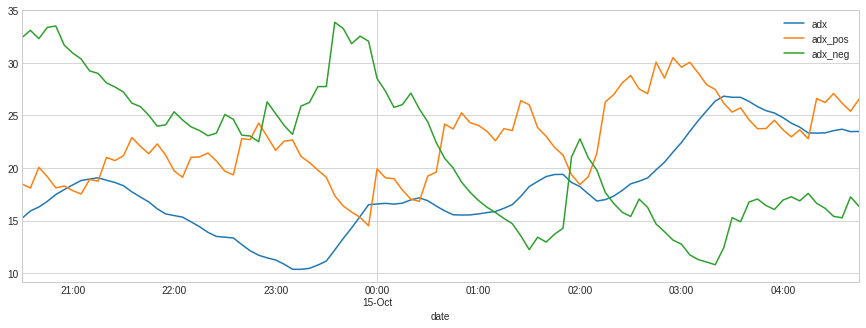

In [29]:
data[['adx', 'adx_pos', 'adx_neg']].iloc[-500:-400].plot(figsize=(15,5))
plt.show()

In [10]:
# pd.options.mode.chained_assignment = None

In [11]:
data['adx_diff'] = data['adx_pos'] - data['adx_neg']

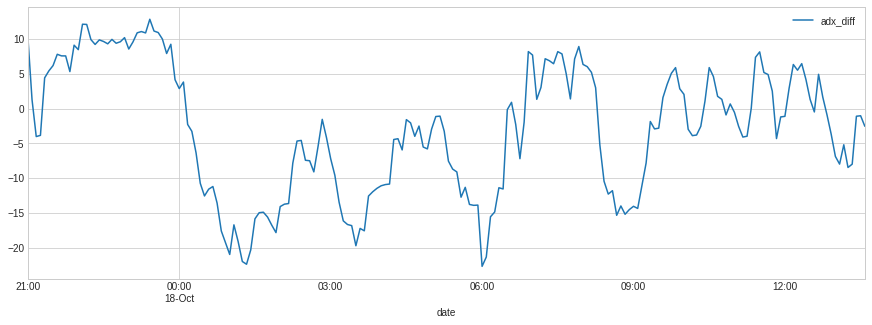

In [12]:
data[['adx_diff']].iloc[-200:].plot(figsize=(15,5))
plt.show()

In [13]:
data[['adx', 'adx_pos', 'adx_neg', 'adx_diff']].describe()

,adx,adx_pos,adx_neg,adx_diff
count,9979.000000,9979.000000,9979.000000,9979.000000
mean,20.571314,21.760625,22.005403,-0.244778
std,7.968294,6.149843,6.246051,11.348699
min,0.000000,4.731492,6.279422,-40.977178
25%,14.874573,17.396807,17.568252,-7.948508
50%,19.034156,21.236242,21.724992,-0.561008
75%,25.093156,25.583934,25.918197,7.601449
max,57.632917,48.002065,48.054535,37.558538


In [40]:
threshold = 30
data['signal'] = np.where(data['adx_diff'] > threshold, -1, 
                          np.where(data['adx_diff'] < -threshold, 1, np.nan))
data['signal'] = data['signal'].ffill().fillna(0)

In [41]:
data['signal'].value_counts()

 1.0    6789
-1.0    3151
 0.0      39
Name: signal, dtype: int64

In [42]:
data['signal'].diff(1).apply(np.abs).value_counts()

0.0    9971
2.0       6
1.0       1
Name: signal, dtype: int64

  0%|          | 0/9978 [00:00<?, ?it/s]

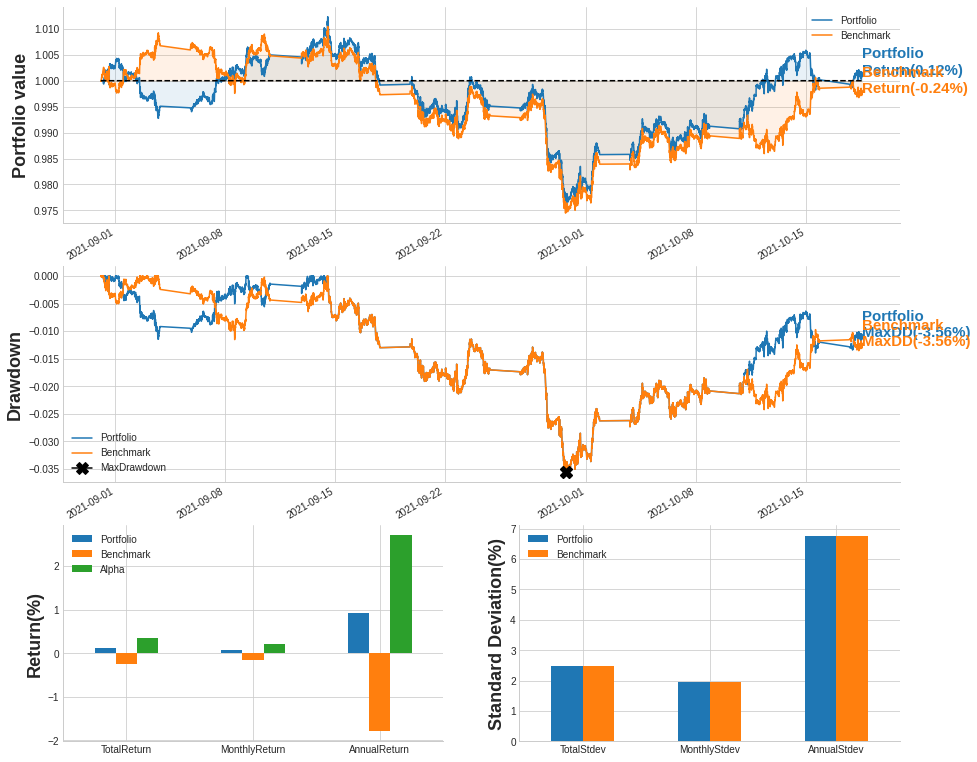

----------------------------------------------------------------------
Data length: |48 days 11:15:00|
Data range from |2021-08-31 02:20:00| to |2021-10-18 13:35:00|
----------------------------------------------------------------------
***** Portfolio Returns in percentage(%) *****
╒═══════════════╤═════════════╤═════════════╤═════════╕
│               │   Portfolio │   Benchmark │   Alpha │
╞═══════════════╪═════════════╪═════════════╪═════════╡
│ TotalReturn   │       0.122 │      -0.239 │   0.360 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ MonthlyReturn │       0.075 │      -0.148 │   0.223 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ AnnualReturn  │       0.916 │      -1.797 │   2.713 │
╘═══════════════╧═════════════╧═════════════╧═════════╛
***** Portfolio Standard Deviation in percentage(%) *****
╒══════════════╤═════════════╤═════════════╕
│              │   Portfolio │   Benchmark │
╞══════════════╪═════════════╪═════════════╡
│ TotalStdev   │   

In [43]:
backtest = IterativeBacktester(data, data['signal'], 'm5')
backtest.backtest()
backtest.results()